In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def manhattan_distance(v1, v2):
    return sum(abs(x - y) for (x, y) in zip(v1, v2))

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = manhattan_distance(y, y_pred)/y.shape(0)
    return err

def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

def gradient_descent_reg_l2(X, y, iterations, eta, reg, x_shape_index=0, log=False):
    W = np.random.randn(X.shape[x_shape_index])
    n = X.shape[x_shape_index]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0 and log:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if log:
        print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

## Задание 1

Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [66]:
# Вес w0; стаж репетитора; стоимость часа занятий; количество занятий в неделю
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [67]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализуем данные стажа и стоимости часа, чтобы они были примерно того-же порядка, что и вес w0

In [68]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [69]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

Стандартизируем данные

In [70]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [71]:
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [72]:
n = 4
lambdas = np.logspace(-5, 0, n)
lambdas = lambdas.copy().astype(np.float64)
lambdas

array([1.00000000e-05, 4.64158883e-04, 2.15443469e-02, 1.00000000e+00])

In [86]:
W_1_array = [gradient_descent_reg_l2(X_st[:, 1], y, iterations=5000, eta=1e-4, reg=lamb, x_shape_index=0, log=False) for lamb in lambdas]
W_2_array = [gradient_descent_reg_l2(X_st[:, 2], y, iterations=5000, eta=1e-4, reg=lamb, x_shape_index=0, log=False) for lamb in lambdas]
W_3_array = [gradient_descent_reg_l2(X_st[:, 3], y, iterations=5000, eta=1e-4, reg=lamb, x_shape_index=0, log=False) for lamb in lambdas]

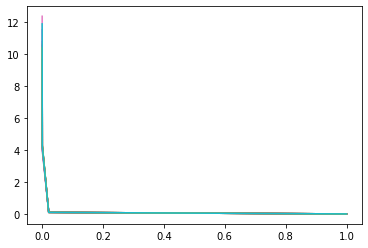

In [74]:
plt.plot(lambdas, W_1_array)

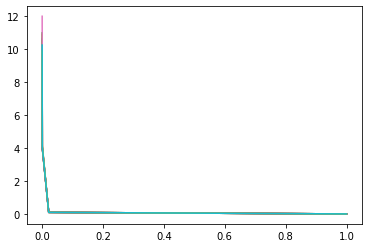

In [75]:
plt.plot(lambdas, W_2_array)

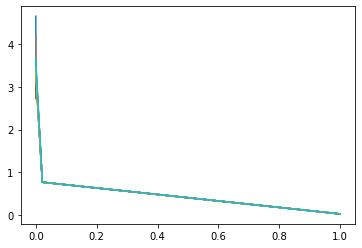

In [76]:
plt.plot(lambdas, W_3_array)

При малых lambda веса большие, при больших lambda веса стремятся к нулю

## Задание 2

Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

Производная $d\lambda |w| = \frac{w}{|w|}, w \neq 0$

In [77]:
def gradient_descent_reg_l2(X, y, iterations, eta, reg, x_shape_index=0, log=False):
    W = np.random.randn(X.shape[x_shape_index])
    n = X.shape[x_shape_index]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W/np.abs(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0 and log:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if log:
        print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [78]:
gradient_descent_reg_l2(X_st[:, 1], y, iterations=5000, eta=1e-4, reg=1e-4, x_shape_index=0, log=False)

array([ 9.50912308, 10.44276076,  9.51430344,  8.35539319,  9.97461654,
       11.85121164, 10.62736444,  9.81242014,  7.9096688 ,  9.25312478])

## Задание 3

*Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет, не можем. Мы можем лишь умножать и делить элементы столбцов матрицы на одно и то же число. По отдельности операции нормализации и стандартизации не нарушают этот принцип. А вместе уже нарушат.

## Задание 4

*Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [96]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

X, Y, coef = make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=3)

In [97]:
display(X, Y, coef)

array([[ 0.59808962, -0.16400084],
       [-0.61277018, -0.97358312],
       [ 1.04310749, -0.66960072],
       ...,
       [ 1.22089151, -2.01159456],
       [-2.21079164,  0.14181052],
       [-0.6387909 , -0.65441521]])

array([ 2.18002939e+01, -1.29264887e+02, -8.43276087e+00,  1.69905867e+02,
        1.34932636e+02, -3.35383428e+01,  9.45677735e+01, -5.43248813e+00,
       -2.97081683e+01, -1.71881455e+02, -4.81295141e+00,  1.79865346e+01,
        3.09108636e+01, -2.01631274e+01,  1.27694788e+02,  9.20782273e+01,
        9.03094898e+01, -9.05676106e+01, -1.39067411e+02, -8.59194598e+01,
        1.29584550e+02,  6.65626452e+01,  3.41619343e+01,  1.51864875e+01,
       -1.70032387e+02, -1.14705468e+02,  2.09623446e+01,  1.27359186e+02,
        1.52259958e+02,  8.89221069e+01,  7.28979898e+01,  6.57444478e+01,
        7.56342971e+01,  6.50889164e+01, -6.51067433e+01, -2.31706653e+02,
       -3.06575885e+02,  1.21776744e+02,  1.07763814e+01,  7.03212339e+01,
       -2.82743354e+01,  1.44732917e+02, -1.25873487e+02,  3.93684880e+02,
        5.92817208e+01,  2.24936199e+02, -1.62667908e+02,  6.80326955e+01,
       -1.46023736e+02,  2.49756800e+01, -5.40719136e+01,  8.02075171e+01,
        6.37027603e+01, -

array([55.20684117, 92.8290393 ])

In [98]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.07987856,  0.0204605 ])

array([0.99326927, 1.02608335])

In [99]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [100]:
 X

array([[ 0.68256232, -0.17977228],
       [-0.53650267, -0.96877473],
       [ 1.13059579, -0.67251966],
       ...,
       [ 1.30958453, -1.98039961],
       [-2.14535287,  0.11826526],
       [-0.56269971, -0.65772017]])

In [101]:
W = gradient_descent_reg_l2(X[:, 1], Y, iterations=5000, eta=1e-4, reg=1e-5, x_shape_index=0, log=False) 

In [88]:
W

array([95.08030057, 94.09268881, 95.39061228, 95.03322817, 95.18610592,
       95.5951454 , 93.81437075, 96.06926131, 94.48620714, 95.90813858,
       95.52680889, 94.46496388, 93.24651839, 95.12621646, 96.45533566,
       94.70798779, 93.94518784, 95.74029151, 94.71734523, 94.45632335,
       96.44308574, 93.9094503 , 96.17013543, 94.21658528, 94.05221471,
       96.43263728, 96.69690281, 95.15268858, 95.0182241 , 93.43367877,
       95.07887247, 95.49134173, 96.31761554, 93.98801735, 94.85347359,
       95.77566654, 96.43460545, 97.8194305 , 95.29893615, 97.33297147,
       96.18949894, 93.60164316, 95.20628228, 94.18318162, 94.45701032,
       95.26326035, 94.7388225 , 93.93800773, 94.36769156, 95.38429998,
       94.71056489, 94.49393047, 96.18434227, 96.44508966, 95.39173418,
       95.16047454, 93.81922682, 93.73905618, 92.66794602, 94.3618916 ,
       94.83611038, 95.25404765, 94.90494612, 97.47589616, 98.13477887,
       95.11387732, 94.61482608, 95.39619525, 95.39169863, 95.80